# Capstone Project: Comment Subtopics Analysis for Airbnb Hosts
---

How can a host on Airbnb understand that are their strengths and weaknesses? How can hosts point out the demand trend of their customers from a large scale of comments? This project focuses on using machine learning tools to help hosts understand the underlying trends of the comments on their property.  

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Capstone-Project:-Comment-Subtopics-Analysis-for-Airbnb-Hosts" data-toc-modified-id="Capstone-Project:-Comment-Subtopics-Analysis-for-Airbnb-Hosts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Capstone Project: Comment Subtopics Analysis for Airbnb Hosts</a></span></li><li><span><a href="#Part-3:-LDA-Analysis-On-Location" data-toc-modified-id="Part-3:-LDA-Analysis-On-Location-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 3: LDA Analysis On Location</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Overall-Review-Score-Rating-Map-to-Dataframe" data-toc-modified-id="Overall-Review-Score-Rating-Map-to-Dataframe-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Overall Review Score Rating Map to Dataframe</a></span></li><li><span><a href="#Building-Location-Dictionary-Map-to-DataFrame" data-toc-modified-id="Building-Location-Dictionary-Map-to-DataFrame-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Building Location Dictionary Map to DataFrame</a></span></li></ul></li><li><span><a href="#Exame-Number-of-Hosts-for-Each-Location-And-Average-Sentiment-Per-Host,-In-Each-Location" data-toc-modified-id="Exame-Number-of-Hosts-for-Each-Location-And-Average-Sentiment-Per-Host,-In-Each-Location-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exame Number of Hosts for Each Location And Average Sentiment Per Host, In Each Location</a></span><ul class="toc-item"><li><span><a href="#Number-of-Host-Per-Location" data-toc-modified-id="Number-of-Host-Per-Location-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Number of Host Per Location</a></span></li></ul></li><li><span><a href="#Examine-Average-Sentiment-Based-On-Location" data-toc-modified-id="Examine-Average-Sentiment-Based-On-Location-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Examine Average Sentiment Based On Location</a></span></li><li><span><a href="#Sentiment-Distribution-Per-Location" data-toc-modified-id="Sentiment-Distribution-Per-Location-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sentiment Distribution Per Location</a></span><ul class="toc-item"><li><span><a href="#Overall-Rating-Distribution-For-Each-Location" data-toc-modified-id="Overall-Rating-Distribution-For-Each-Location-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Overall Rating Distribution For Each Location</a></span></li></ul></li><li><span><a href="#LDA-Analysis-Based-On-Different-Location" data-toc-modified-id="LDA-Analysis-Based-On-Different-Location-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LDA Analysis Based On Different Location</a></span></li><li><span><a href="#LDA-Run" data-toc-modified-id="LDA-Run-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>LDA Run</a></span></li><li><span><a href="#Notes-:" data-toc-modified-id="Notes-:-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Notes :</a></span></li><li><span><a href="#LDA-On-Different-Location" data-toc-modified-id="LDA-On-Different-Location-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>LDA On Different Location</a></span><ul class="toc-item"><li><span><a href="#South-of-Market" data-toc-modified-id="South-of-Market-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>South of Market</a></span></li><li><span><a href="#Inner-Sunset" data-toc-modified-id="Inner-Sunset-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>Inner Sunset</a></span></li><li><span><a href="#Castro/Upper-Market" data-toc-modified-id="Castro/Upper-Market-2.7.3"><span class="toc-item-num">2.7.3&nbsp;&nbsp;</span>Castro/Upper Market</a></span></li><li><span><a href="#Western-Addition" data-toc-modified-id="Western-Addition-2.7.4"><span class="toc-item-num">2.7.4&nbsp;&nbsp;</span>Western Addition</a></span></li></ul></li></ul></li></ul></div>


# Part 3: LDA Analysis On Location 

- Since Location is always an important features in determining the qualify of the house, in this notebook, I will focus on examine if there is any difference key features that distingush one location from the others. 
---

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation

from gensim import corpora, models
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

np.random.seed(42)

In [30]:
reviews = pd.read_csv('../data/reviews_sentiment_score.csv', index_col = 0)

In [31]:
reviews.head()

,key_0,listing_id,id,date,reviewer_id,reviewer_name,comments,language,overall_rating,compound,neg,neu,pos
0,0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",en,97.0,0.9590,0.000,0.788,0.212
1,1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,en,97.0,0.9819,0.000,0.697,0.303
2,2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,en,97.0,0.7600,0.134,0.710,0.156
3,3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,en,97.0,0.9840,0.035,0.646,0.319
4,4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,en,97.0,0.9617,0.000,0.613,0.387


In [32]:
reviews.dtypes

key_0               int64
listing_id          int64
id                  int64
date               object
reviewer_id         int64
reviewer_name      object
comments           object
language           object
overall_rating    float64
compound          float64
neg               float64
neu               float64
pos               float64
dtype: object

In [33]:
len(set(reviews['listing_id']))

4199

In [34]:
listing = pd.read_csv('../data/listings/2019-03-06_data_listings.csv')

In [35]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20190306152813,2019-03-06,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.54
1,5858,https://www.airbnb.com/rooms/5858,20190306152813,2019-03-06,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.93
2,7918,https://www.airbnb.com/rooms/7918,20190306152813,2019-03-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
3,8142,https://www.airbnb.com/rooms/8142,20190306152813,2019-03-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
4,8339,https://www.airbnb.com/rooms/8339,20190306152813,2019-03-06,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.23


In [36]:
listing[['id', 'neighbourhood_cleansed']].head()

,id,neighbourhood_cleansed
0,958,Western Addition
1,5858,Bernal Heights
2,7918,Haight Ashbury
3,8142,Haight Ashbury
4,8339,Western Addition


### Overall Review Score Rating Map to Dataframe
---

In [37]:
review_rating_df = listing[['id', 'review_scores_rating']]

In [13]:
review_rating_df.isnull().sum()

id                         0
review_scores_rating    1421
dtype: int64

In [14]:
rating_dict = {}
for i, rate in zip(listing['id'],listing['review_scores_rating']):
    rating_dict[i] = rate

In [15]:
reviews['overall_rating'] = reviews['listing_id'].map(rating_dict)

In [16]:
reviews.head()

,key_0,listing_id,id,date,reviewer_id,reviewer_name,comments,language,overall_rating,compound,neg,neu,pos
0,0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",en,97.0,0.9590,0.000,0.788,0.212
1,1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,en,97.0,0.9819,0.000,0.697,0.303
2,2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,en,97.0,0.7600,0.134,0.710,0.156
3,3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,en,97.0,0.9840,0.035,0.646,0.319
4,4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,en,97.0,0.9617,0.000,0.613,0.387


### Building Location Dictionary Map to DataFrame

---

In [17]:
location_dict = {}
for i, neighbourhood in zip(listing['id'],listing['neighbourhood_cleansed']):
    location_dict[i] = neighbourhood

In [18]:
len(location_dict)

7151

In [19]:
neighbourhood = reviews['listing_id'].map(location_dict)

In [20]:
reviews['neighbourhood'] = neighbourhood

In [21]:
reviews.head()

,key_0,listing_id,id,date,reviewer_id,reviewer_name,comments,language,overall_rating,compound,neg,neu,pos,neighbourhood
0,0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",en,97.0,0.9590,0.000,0.788,0.212,Western Addition
1,1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,en,97.0,0.9819,0.000,0.697,0.303,Western Addition
2,2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,en,97.0,0.7600,0.134,0.710,0.156,Western Addition
3,3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,en,97.0,0.9840,0.035,0.646,0.319,Western Addition
4,4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,en,97.0,0.9617,0.000,0.613,0.387,Western Addition


In [22]:
#
neighbourhood_list = reviews['neighbourhood'].unique()

## Exame Number of Hosts for Each Location And Average Sentiment Per Host, In Each Location 

---

In [23]:
avg_sent_per_listing = reviews[['listing_id', 'compound']].groupby(by = ["listing_id"]).mean()
avg_sent_per_listing.reset_index(inplace= True)

In [24]:
avg_sent_per_listing['neighbourhood'] = avg_sent_per_listing['listing_id'].map(location_dict)

In [26]:
avg_sent_per_listing.head()

,listing_id,compound,neighbourhood
0,958,0.905033,Western Addition
1,5858,0.882490,Bernal Heights
2,7918,0.959018,Haight Ashbury
3,8142,0.981643,Haight Ashbury
4,8339,0.948511,Western Addition


In [27]:
neighbourhood_count_df = avg_sent_per_listing[['neighbourhood', 'listing_id']].groupby(by = ['neighbourhood']).count()
neighbourhood_count_df.reset_index(inplace= True)

In [28]:
neighbourhood_count_df

,neighbourhood,listing_id
0,Bayview,84
1,Bernal Heights,281
2,Castro/Upper Market,273
3,Chinatown,57
4,Crocker Amazon,19
5,Diamond Heights,14
6,Downtown/Civic Center,232
7,Excelsior,108
8,Financial District,62
9,Glen Park,49


### Number of Host Per Location 

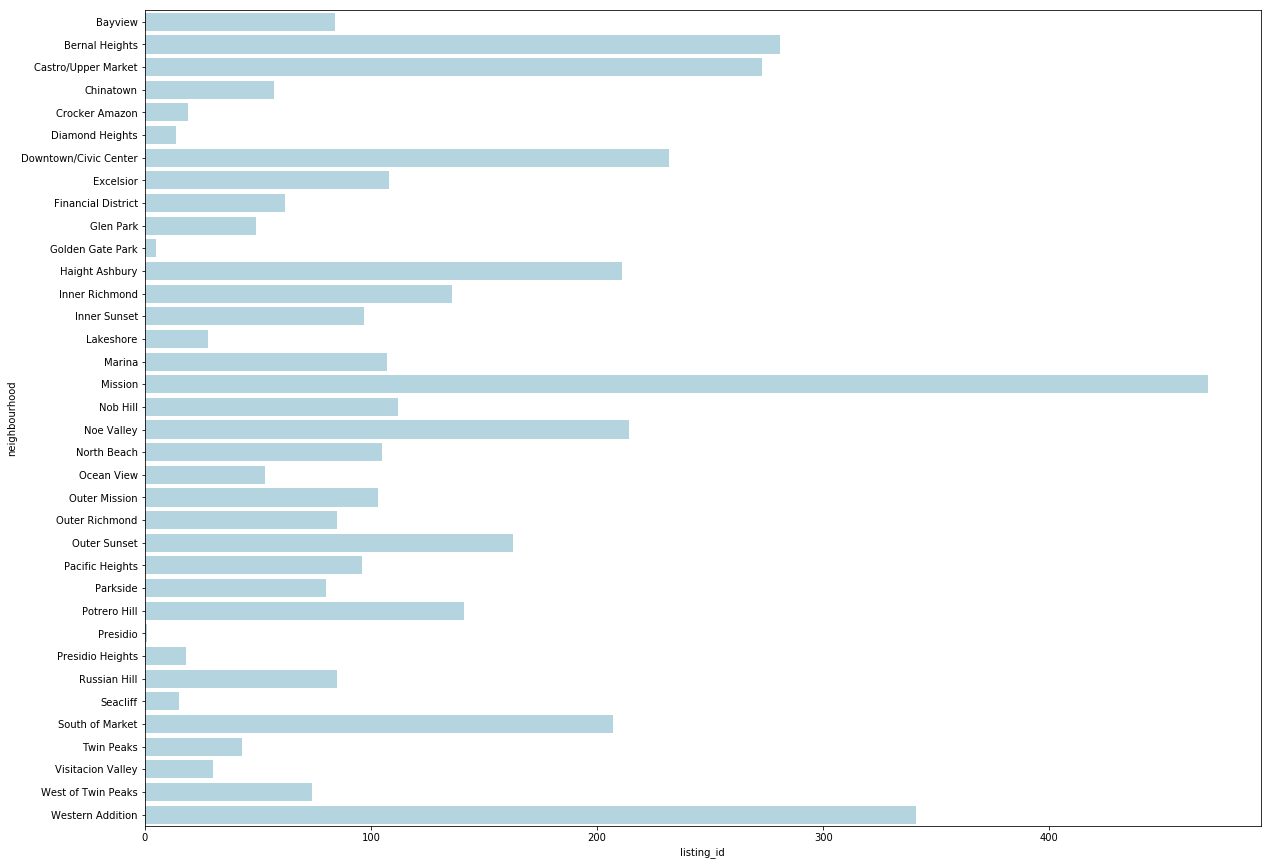

In [29]:
plt.figure(figsize = (20,15))
sns.barplot(y = neighbourhood_count_df['neighbourhood'], x = neighbourhood_count_df['listing_id'], color = "lightblue")

## Examine Average Sentiment Based On Location 
---

In [21]:
neighbourhood_sentiment = reviews[['neighbourhood', 'compound']].groupby(by = ["neighbourhood"]).mean()

In [22]:
neighbourhood_sentiment.reset_index(inplace= True)

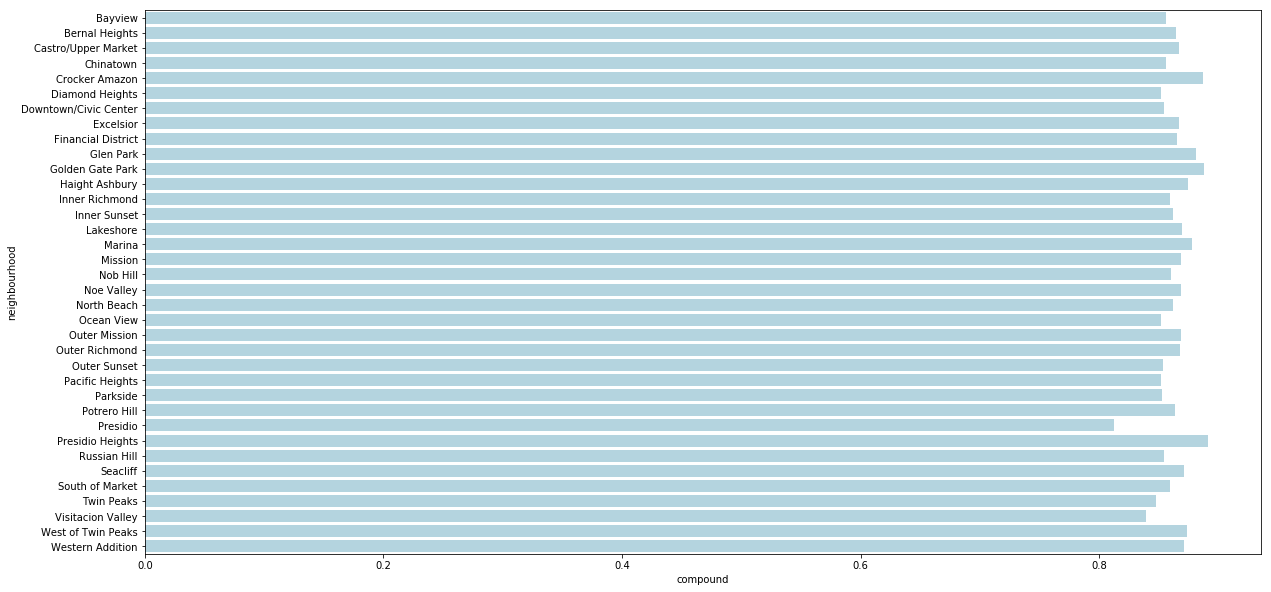

In [23]:
plt.figure(figsize = (20,10))
sns.barplot(y = neighbourhood_sentiment['neighbourhood'], x = neighbourhood_sentiment['compound'], color = "lightblue")

## Sentiment Distribution Per Location 
---

In [30]:
avg_sent_per_listing.head(10)

,listing_id,compound,neighbourhood
0,958,0.905033,Western Addition
1,5858,0.882490,Bernal Heights
2,7918,0.959018,Haight Ashbury
3,8142,0.981643,Haight Ashbury
4,8339,0.948511,Western Addition
5,8567,0.905455,Western Addition
6,8739,0.928308,Mission
7,9225,0.875336,Potrero Hill
8,10251,0.874053,Mission
9,10820,0.923806,Haight Ashbury


In [31]:
neighbourhood_list = avg_sent_per_listing['neighbourhood'].unique()
neighbourhood_list

array(['Western Addition', 'Bernal Heights', 'Haight Ashbury', 'Mission',
       'Potrero Hill', 'Downtown/Civic Center', 'Castro/Upper Market',
       'Inner Sunset', 'South of Market', 'Noe Valley', 'Nob Hill',
       'Outer Richmond', 'Presidio Heights', 'Glen Park', 'Ocean View',
       'Pacific Heights', 'Financial District', 'Twin Peaks',
       'Russian Hill', 'Outer Sunset', 'North Beach', 'Marina',
       'Inner Richmond', 'Excelsior', 'Seacliff', 'Chinatown',
       'West of Twin Peaks', 'Bayview', 'Diamond Heights',
       'Outer Mission', 'Parkside', 'Lakeshore', 'Crocker Amazon',
       'Golden Gate Park', 'Visitacion Valley', 'Presidio'], dtype=object)

In [32]:
len(neighbourhood_list)

36

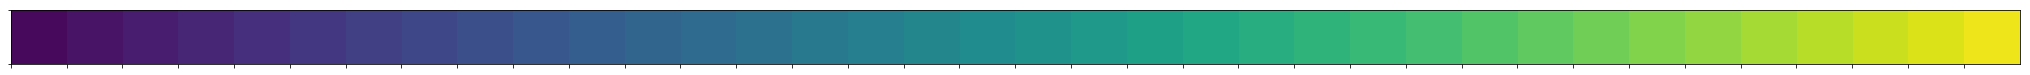

In [33]:
sns.palplot(sns.color_palette("viridis", 36))

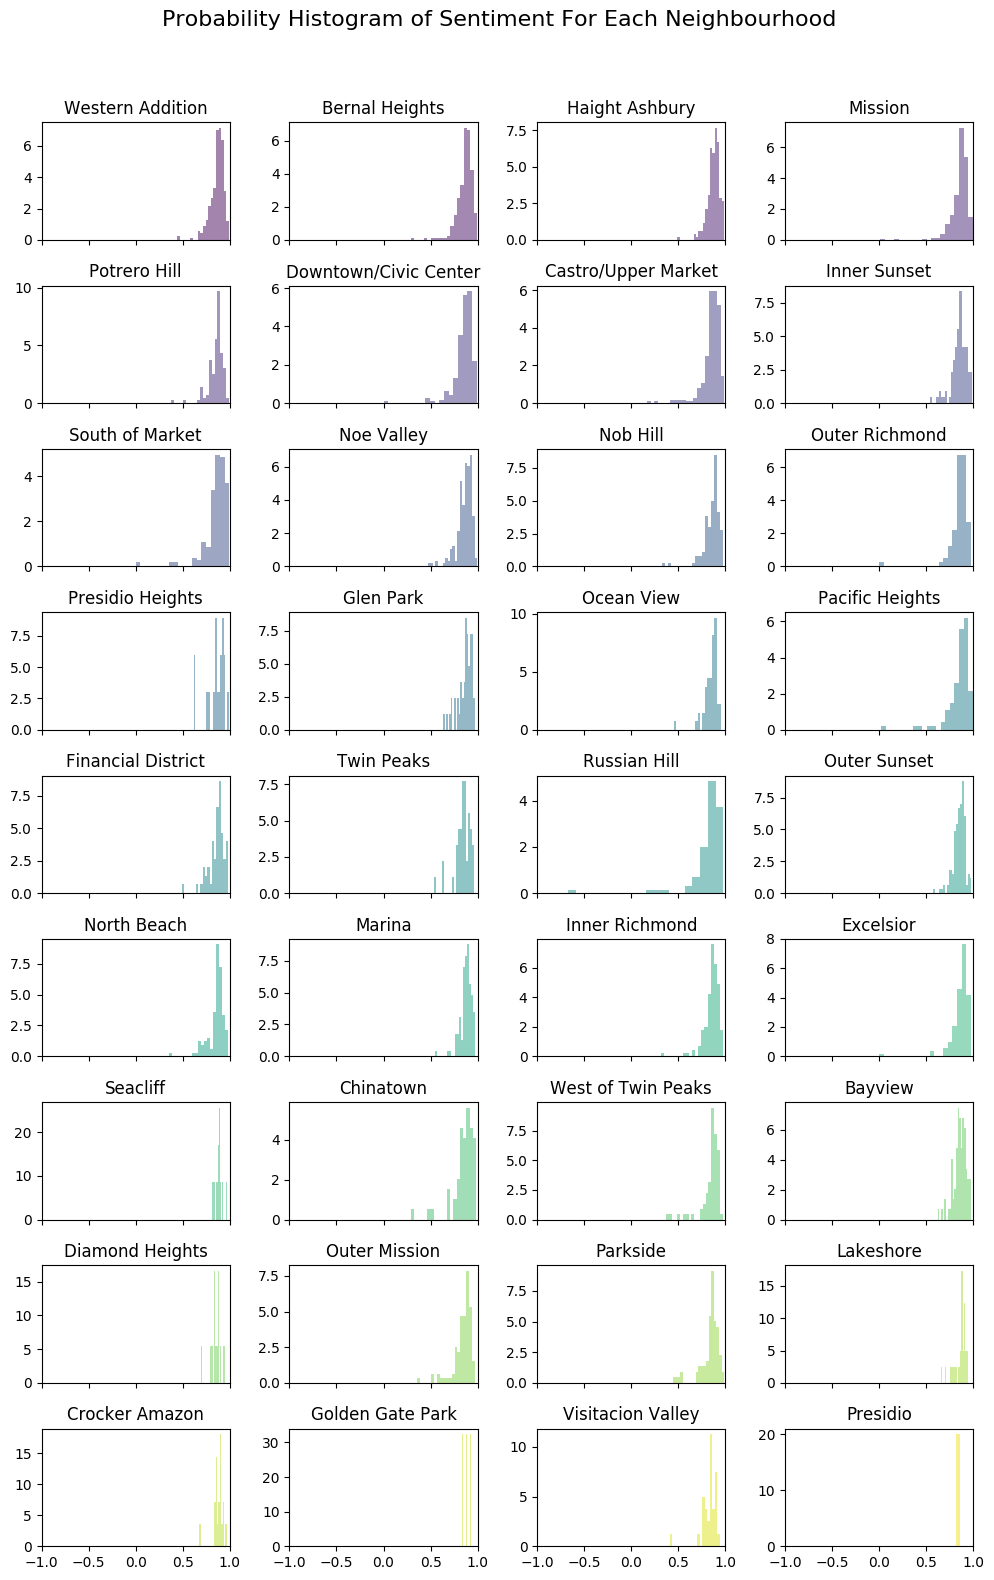

In [34]:
# Plot
fig, axes = plt.subplots(9, 4, figsize=(10,15), dpi=100, sharex=True, sharey=False)
colors = sns.color_palette("viridis", 36)

for i, (ax, neighbour) in enumerate(zip(axes.flatten(), avg_sent_per_listing['neighbourhood'].unique())):
    x = avg_sent_per_listing.loc[avg_sent_per_listing['neighbourhood']== neighbour, "compound"]
    ax.hist(x, alpha=0.5, bins=20, density=True, stacked=True, label=str(neighbour), color = colors[i])
    ax.set_title(neighbour)

plt.suptitle('Probability Histogram of Sentiment For Each Neighbourhood', y=1.05, size=16)
ax.set_xlim(-1, 1);
plt.tight_layout();

### Overall Rating Distribution For Each Location 

In [38]:
avg_rating_df = reviews[['listing_id', 'overall_rating']].groupby(by = ["listing_id"]).mean()

In [40]:
avg_rating_df.reset_index(inplace= True)

In [41]:
avg_rating_df['neighbourhood'] = avg_rating_df['listing_id'].map(location_dict)

In [42]:
avg_rating_df.head()

,listing_id,overall_rating,neighbourhood
0,958,97.0,Western Addition
1,5858,98.0,Bernal Heights
2,7918,85.0,Haight Ashbury
3,8142,93.0,Haight Ashbury
4,8339,97.0,Western Addition


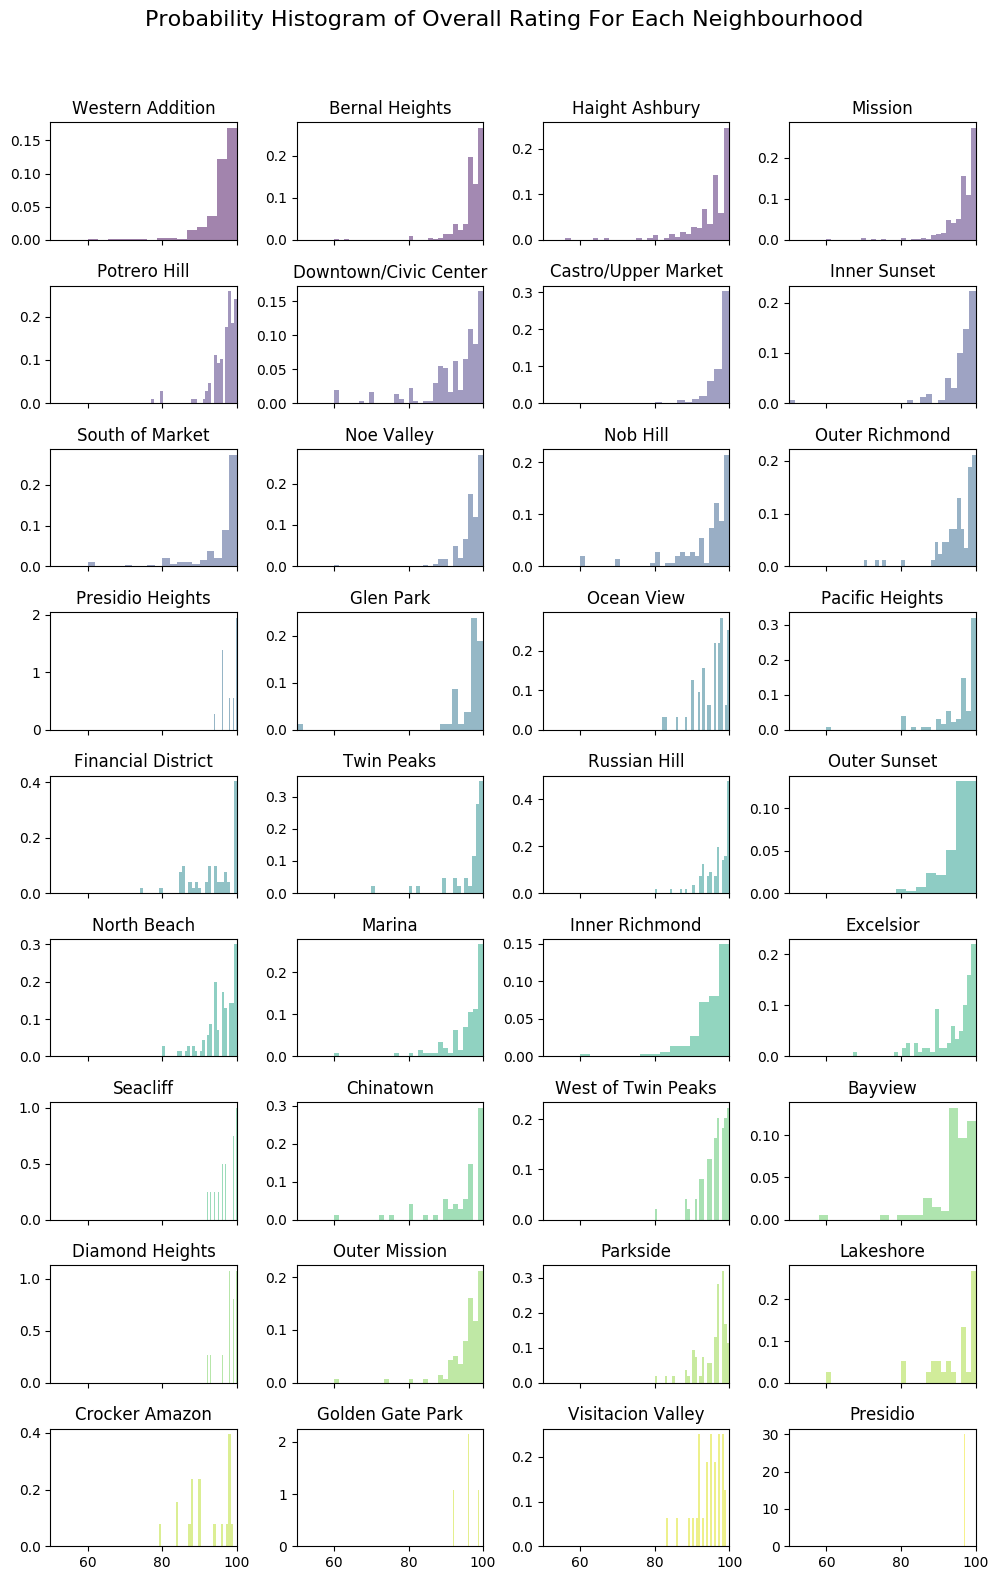

In [45]:
# Plot
fig, axes = plt.subplots(9, 4, figsize=(10,15), dpi=100, sharex=True, sharey=False)
colors = sns.color_palette("viridis", 36)

for i, (ax, neighbour) in enumerate(zip(axes.flatten(), avg_rating_df['neighbourhood'].unique())):
    x = avg_rating_df.loc[avg_rating_df['neighbourhood']== neighbour, "overall_rating"]
    ax.hist(x, alpha=0.5, bins=30, density=True, stacked=True, label=str(neighbour), color = colors[i])
    ax.set_title(neighbour)

plt.suptitle('Probability Histogram of Overall Rating For Each Neighbourhood', y=1.05, size=16)
ax.set_xlim(50, 100);
plt.tight_layout();

In [97]:
reviews[reviews['overall_rating'] < 80].hea

,key_0,listing_id,id,date,reviewer_id,reviewer_name,comments,language,compound,neg,neu,pos,overall_rating,neighbourhood
1789,1870,12042,4447636,2013-05-06,4053756,Filippo,Aaron was a great host during my month in San ...,en,0.9975,0.012,0.551,0.437,64.0,Haight Ashbury
1790,1871,12042,18447138,2014-08-26,18903791,Eric,Aaron is a really nice guy. If there is anythi...,en,0.9771,0.000,0.529,0.471,64.0,Haight Ashbury
1791,1872,12042,36612983,2015-06-29,35087011,Julio,Host definitely made me feel welcomed. The roo...,en,0.9750,0.000,0.368,0.632,64.0,Haight Ashbury
1792,1873,12042,41959134,2015-08-10,23947735,Bear Mommy,Aaron is very nice and welcoming. The house is...,en,0.9721,0.000,0.565,0.435,64.0,Haight Ashbury
1793,1874,12042,51195352,2015-10-18,45551282,Sachin,We had a comfortable stay in the house. The be...,en,0.9939,0.000,0.650,0.350,64.0,Haight Ashbury
3045,3168,21914,543064,2011-09-18,1098999,Pui,I was happy with my stay at Aaron's place !!! ...,en,0.9734,0.000,0.667,0.333,78.0,Haight Ashbury
3046,3169,21914,2408295,2012-09-25,1234393,Chiba,Great host! Very helpfull with information abo...,en,0.9709,0.000,0.453,0.547,78.0,Haight Ashbury
3047,3170,21914,2575788,2012-10-10,3609771,Derek,Communal / hostel type place with shared bathr...,en,0.9772,0.000,0.645,0.355,78.0,Haight Ashbury
3048,3171,21914,14102405,2014-06-11,1823147,Sneha,"Very nice guy, gave me a tour, and chatted wit...",en,0.9690,0.023,0.766,0.210,78.0,Haight Ashbury
3049,3172,21914,18242184,2014-08-24,15236719,Alain,"Aaron was a great host, and very accommodating...",en,0.9824,0.000,0.723,0.277,78.0,Haight Ashbury


## LDA Analysis Based On Different Location
---

In [46]:
neighbourhood_list

array(['Western Addition', 'Bernal Heights', 'Haight Ashbury', 'Mission',
       'Potrero Hill', 'Downtown/Civic Center', 'Castro/Upper Market',
       'Inner Sunset', 'South of Market', 'Noe Valley', 'Nob Hill',
       'Outer Richmond', 'Presidio Heights', 'Glen Park', 'Ocean View',
       'Pacific Heights', 'Financial District', 'Twin Peaks',
       'Russian Hill', 'Outer Sunset', 'North Beach', 'Marina',
       'Inner Richmond', 'Excelsior', 'Seacliff', 'Chinatown',
       'West of Twin Peaks', 'Bayview', 'Diamond Heights',
       'Outer Mission', 'Parkside', 'Lakeshore', 'Crocker Amazon',
       'Golden Gate Park', 'Visitacion Valley', 'Presidio'], dtype=object)

In [47]:
reviews[reviews['neighbourhood'] == neighbourhood_list[0]]['comments'].head()

0    Our experience was, without a doubt, a five st...
1    Returning to San Francisco is a rejuvenating t...
2    We were very pleased with the accommodations a...
3    We highly recommend this accomodation and agre...
4    Holly's place was great. It was exactly what I...
Name: comments, dtype: object

In [48]:
#Western Addition LDA Analysis 
cv = CountVectorizer(ngram_range= (2,3), 
                     stop_words= 'english', 
                     min_df = 2)
cv_transform = cv.fit_transform(reviews[reviews['neighbourhood'] == neighbourhood_list[0]]['comments'])

In [49]:
cv_df =  pd.DataFrame(cv_transform.toarray(), columns = cv.get_feature_names())

In [50]:
texts = [cv_df.columns[cv_df.loc[index,:].nonzero()] for index in cv_df.index]

/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


In [51]:
dictionary = corpora.Dictionary(texts)

In [52]:
corpus = [dictionary.doc2bow(text) for text in texts]

## LDA Run
---

## Notes : 
- break down starts and aggreagte the result to see what are the key topics in each level of stars. (most common charaterictic of subtopics for each host)
- measurement of accuracy; use actual post to back up the finding of each star's subtopic. 
- metric for LDA, how do you evaluate to determine the success of the measure. 


In [69]:
def lda_function(df, location, n_topic): 
    cv = CountVectorizer(ngram_range= (2,3), 
                     stop_words= 'english', 
                     min_df = 2)
    
    cv_transform = cv.fit_transform(df[df['neighbourhood'] == location]) 

    cv_df =  pd.DataFrame(cv_transform.toarray(), columns = cv.get_feature_names())

    texts = [cv_df.columns[cv_df.loc[index,:].nonzero()] for index in cv_df.index]

    dictionary = corpora.Dictionary(texts)

    corpus = [dictionary.doc2bow(text) for text in texts]

    ldamodel = models.ldamodel.LdaModel(corpus, 
                                        id2word = dictionary, 
                                        num_topics = n_topic, 
                                        passes = 5, 
                                        minimum_probability = 0.01)

    return pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

In [48]:
#Western Addition LDA Analysis 
cv = CountVectorizer(ngram_range= (2,3), 
                     stop_words= 'english', 
                     min_df = 2)
cv_transform = cv.fit_transform(reviews[reviews['neighbourhood'] == neighbourhood_list[0]]['comments'])

In [49]:
cv_df =  pd.DataFrame(cv_transform.toarray(), columns = cv.get_feature_names())

In [50]:
texts = [cv_df.columns[cv_df.loc[index,:].nonzero()] for index in cv_df.index]

/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


In [51]:
dictionary = corpora.Dictionary(texts)

In [52]:
corpus = [dictionary.doc2bow(text) for text in texts]

## LDA On Different Location 
---

### South of Market
---

In [89]:
cv = CountVectorizer(ngram_range= (2,3), 
                     stop_words= 'english', 
                     min_df = 2)
cv_transform = cv.fit_transform(reviews[reviews['neighbourhood'] == neighbourhood_list[10]]['comments'])

cv_df =  pd.DataFrame(cv_transform.toarray(), columns = cv.get_feature_names())

texts = [cv_df.columns[cv_df.loc[index,:].nonzero()] for index in cv_df.index]

dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = models.ldamodel.LdaModel(corpus, 
                                        id2word = dictionary, 
                                        num_topics = 10, 
                                        passes = 5, 
                                        minimum_probability = 0.01)

pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.110098 -0.065550       1        1  14.255421
0     -0.187183 -0.125082       2        1  12.617869
7      0.000498 -0.073551       3        1  10.647337
3     -0.004224 -0.070657       4        1  10.425982
1     -0.037301  0.064544       5        1  10.416408
2      0.150541  0.002900       6        1   9.837976
4     -0.060087  0.037412       7        1   9.383022
6      0.082801 -0.004571       8        1   7.740259
9     -0.055286  0.214582       9        1   7.511468
8      0.000142  0.019974      10        1   7.164258, topic_info=      Category        Freq                   Term       Total  loglift  \
15301  Default  372.000000            alice place  372.000000  30.0000   
1      Default  665.000000         great location  665.000000  29.0000   
194    Default   69.000000         location close   69.000000  28.0000   
1729   Default   71.000000            great space   71.000000  27.0000   
9      Default  194.000000            place great  194.000000  26.0000   
483    Default   94.000000             nice place   94.000000  25.0000   
15319  Default   94.000000      alice place great   94.000000  24.0000   
2154   Default   85.000000        shared bathroom   85.000000  23.0000   
6      Default   62.000000         location super   62.000000  22.0000   
15318  Default   71.000000           thanks alice   71.000000  21.0000   
1811   Default  135.000000             room clean  135.000000  20.0000   
15320  Default   82.000000             stay alice   82.000000  19.0000   
3381   Default   68.000000             super easy   68.000000  18.0000   
4314   Default   44.000000          location stay   44.000000  17.0000   
1683   Default  148.000000            place clean  148.000000  16.0000   
9276   Default   59.000000            room shared   59.000000  15.0000   
10112  Default   42.000000             space good   42.000000  14.0000   
1205   Default   74.000000             easy check   74.000000  13.0000   
1930   Default   60.000000   clean great location   60.000000  12.0000   
1321   Default   64.000000            space great   64.000000  11.0000   
109    Default  221.000000       highly recommend  221.000000  10.0000   
1466   Default  226.000000          good location  226.000000   9.0000   
531    Default   45.000000            great clean   45.000000   8.0000   
14562  Default   39.000000    space good location   39.000000   7.0000   
8590   Default   39.000000    great location stay   39.000000   6.0000   
15324  Default   46.000000        alice attentive   46.000000   5.0000   
1590   Default   46.000000        responsive host   46.000000   4.0000   
14670  Default   39.000000      great space great   39.000000   3.0000   
9141   Default   40.000000              easy stay   40.000000   2.0000   
6018   Default   62.000000         clean bathroom   62.000000   1.0000   
...        ...         ...                    ...         ...      ...   
13573  Topic10   19.510342              clean nob   20.412971   2.5908   
15304  Topic10   19.504261         location alice   20.407341   2.5908   
13562  Topic10   19.502378       guest room great   20.406773   2.5907   
12321  Topic10   19.303228            perfect bed   20.205084   2.5904   
1782   Topic10   19.301821  spot central location   20.203699   2.5904   
1781   Topic10   19.301821           spot central   20.203699   2.5904   
8508   Topic10   19.299700       room great clean   20.201633   2.5904   
8628   Topic10   19.296991     place surprisingly   20.198969   2.5904   
5774   Topic10   19.296618           close center   20.198811   2.5904   
7256   Topic10   19.292654            easy guests   20.194801   2.5904   
3043   Topic10   19.272745            wifi spotty   20.175629   2.5903   
194    Topic10   65.834801         location close   69.166603   2.5867   
1729   Topic10   65.890099            great space   7

### Inner Sunset
---

In [88]:
cv = CountVectorizer(ngram_range= (2,3), 
                     stop_words= 'english', 
                     min_df = 2)
cv_transform = cv.fit_transform(reviews[reviews['neighbourhood'] == neighbourhood_list[9]]['comments'])

cv_df =  pd.DataFrame(cv_transform.toarray(), columns = cv.get_feature_names())

texts = [cv_df.columns[cv_df.loc[index,:].nonzero()] for index in cv_df.index]

dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = models.ldamodel.LdaModel(corpus, 
                                        id2word = dictionary, 
                                        num_topics = 10, 
                                        passes = 5, 
                                        minimum_probability = 0.01)

pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.205379  0.080990       1        1  20.474361
8     -0.163912 -0.144498       2        1  13.328802
6     -0.065150 -0.101219       3        1  10.715086
2     -0.022916  0.174604       4        1  10.380157
5      0.008827  0.118298       5        1   9.253345
4      0.063871 -0.042134       6        1   7.835917
7      0.071443 -0.067049       7        1   7.737726
9      0.076676  0.025534       8        1   7.635356
1      0.119433  0.021185       9        1   6.329841
3      0.117107 -0.065712      10        1   6.309419, topic_info=      Category         Freq                         Term        Total  \
574    Default   990.000000                   place stay   990.000000   
411    Default  1604.000000               great location  1604.000000   
121    Default  2372.000000                   noe valley  2372.000000   
30     Default   997.000000             walking distance   997.000000   
56     Default  2543.000000                san francisco  2543.000000   
2350   Default   318.000000             great place stay   318.000000   
504    Default   279.000000                    like home   279.000000   
1998   Default   476.000000           quiet neighborhood   476.000000   
12     Default   991.000000                  great place   991.000000   
15     Default  1467.000000             highly recommend  1467.000000   
318    Default   529.000000                  24th street   529.000000   
190    Default   357.000000                  great hosts   357.000000   
344    Default   538.000000            shops restaurants   538.000000   
889    Default   698.000000                  place great   698.000000   
1129   Default   225.000000                good location   225.000000   
564    Default   242.000000                 location noe   242.000000   
519    Default   485.000000              recommend place   485.000000   
1464   Default   911.000000                   great host   911.000000   
565    Default   227.000000          location noe valley   227.000000   
5037   Default   124.000000                    bed super   124.000000   
940    Default   169.000000                 close public   169.000000   
270    Default   341.000000                     stay san   341.000000   
62354  Default   146.000000                     peg jeff   146.000000   
271    Default   305.000000           stay san francisco   305.000000   
989    Default   141.000000                   right home   141.000000   
7198   Default   159.000000                  clean great   159.000000   
368    Default   153.000000                  stay highly   153.000000   
954    Default   288.000000            restaurants shops   288.000000   
619    Default   155.000000                    away home   155.000000   
27     Default   450.000000            recommend staying   450.000000   
...        ...          ...                          ...          ...   
17009  Topic10    25.690687               distance shops    26.726723   
14310  Topic10    25.388102          great communicating    26.424263   
21035  Topic10    25.233566                    used uber    26.269905   
18803  Topic10    24.844418                sf experience    25.880520   
11588  Topic10    24.785225           helpful definitely    25.821238   
20191  Topic10    24.526848                   time using    25.562855   
17028  Topic10    23.933916       walking distance shops    24.969954   
8238   Topic10    23.838367          place good location    24.874384   
1330   Topic10    23.369719                   muni train    24.405909   
62354  Topic10   111.079094                     peg jeff   146.606903   
6383   Topic10    48.549145                 nice touches    57.649300   
5774   Topic10    49.528671        beautiful comfortable    59.846855   
1129   Topic10   122.313538                good location   225.681885   
940    Topic10    93.796

### Castro/Upper Market
---

In [87]:
cv = CountVectorizer(ngram_range= (2,3), 
                     stop_words= 'english', 
                     min_df = 2)
cv_transform = cv.fit_transform(reviews[reviews['neighbourhood'] == neighbourhood_list[8]]['comments'])

cv_df =  pd.DataFrame(cv_transform.toarray(), columns = cv.get_feature_names())

texts = [cv_df.columns[cv_df.loc[index,:].nonzero()] for index in cv_df.index]

dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = models.ldamodel.LdaModel(corpus, 
                                        id2word = dictionary, 
                                        num_topics = 10, 
                                        passes = 5, 
                                        minimum_probability = 0.01)

pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.010595  0.107540       1        1  12.819153
6     -0.240929  0.069491       2        1  11.521225
9      0.122539 -0.008425       3        1  11.017622
4     -0.078193 -0.169240       4        1  10.957263
2      0.008420  0.017028       5        1  10.909782
7      0.091535  0.103960       6        1  10.337387
0      0.038495 -0.075820       7        1   8.974945
8      0.051000 -0.113193       8        1   8.848740
3      0.021140  0.090146       9        1   7.351340
1     -0.024601 -0.021488      10        1   7.262544, topic_info=      Category        Freq                       Term       Total  loglift  \
538    Default  397.000000                 place stay  397.000000  30.0000   
180    Default  457.000000                great place  457.000000  29.0000   
2956   Default  170.000000           great place stay  170.000000  28.0000   
136    Default  630.000000             great location  630.000000  27.0000   
278    Default  566.000000                 great host  566.000000  26.0000   
30     Default   82.000000               days arrival   82.000000  25.0000   
26     Default   80.000000  arrival automated posting   80.000000  24.0000   
25     Default   80.000000          arrival automated   80.000000  23.0000   
27     Default   80.000000          automated posting   80.000000  22.0000   
31     Default   79.000000     days arrival automated   79.000000  21.0000   
90     Default   71.000000              host canceled   71.000000  20.0000   
89     Default   71.000000       canceled reservation   71.000000  19.0000   
91     Default   71.000000  host canceled reservation   71.000000  18.0000   
185    Default  327.000000                place great  327.000000  17.0000   
509    Default  109.000000                   stay san  109.000000  16.0000   
173    Default   60.000000        really enjoyed stay   60.000000  15.0000   
8379   Default   52.000000             place stay san   52.000000  14.0000   
2319   Default   66.000000                place super   66.000000  13.0000   
172    Default  118.000000             really enjoyed  118.000000  12.0000   
171    Default  160.000000               enjoyed stay  160.000000  11.0000   
186    Default   72.000000       place great location   72.000000  10.0000   
686    Default  187.000000            recommend place  187.000000   9.0000   
3959   Default  112.000000          centrally located  112.000000   8.0000   
510    Default   95.000000         stay san francisco   95.000000   7.0000   
1984   Default   53.000000                 clean nice   53.000000   6.0000   
863    Default  134.000000                 nice place  134.000000   5.0000   
3387   Default   62.000000            host responsive   62.000000   4.0000   
1515   Default   52.000000            extremely clean   52.000000   3.0000   
181    Default   40.000000          great place great   40.000000   2.0000   
1136   Default   41.000000                clean place   41.000000   1.0000   
...        ...         ...                        ...         ...      ...   
7165   Topic10   19.660202                   try stay   22.436562   2.4903   
13742  Topic10    9.816374         overall great stay   10.826502   2.5245   
7821   Topic10   12.903536             distance great   14.485271   2.5068   
8055   Topic10   16.057329          civic center bart   18.700403   2.4701   
6520   Topic10   21.091230              awesome place   25.878864   2.4179   
3179   Topic10   15.913702                center bart   19.824778   2.4027   
3970   Topic10   21.425692                check great   29.545052   2.3011   
3734   Topic10   17.212654             definitely try   24.141207   2.2842   
3608   Topic10   13.574509   overall great experience   17.657269   2.3595   
2212   Topic10   30.792557                 easy check   64.219788   1.8874   
1498   Topic10   20.740602       

### Western Addition
---

In [79]:
cv = CountVectorizer(ngram_range= (2,3), 
                     stop_words= 'english', 
                     min_df = 2)
cv_transform = cv.fit_transform(reviews[reviews['neighbourhood'] == neighbourhood_list[0]]['comments'])

cv_df =  pd.DataFrame(cv_transform.toarray(), columns = cv.get_feature_names())

texts = [cv_df.columns[cv_df.loc[index,:].nonzero()] for index in cv_df.index]

dictionary = corpora.Dictionary(texts)
r
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = models.ldamodel.LdaModel(corpus, 
                                        id2word = dictionary, 
                                        num_topics = 10, 
                                        passes = 5, 
                                        minimum_probability = 0.01)

pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  
/Users/evelyn/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.172636  0.050214       1        1  15.501848
9      0.115255 -0.116518       2        1  14.227059
5      0.126250  0.147139       3        1  12.742871
3      0.005365 -0.053983       4        1  10.109427
7      0.049175 -0.023744       5        1   9.991705
6     -0.048977  0.080038       6        1   9.237323
4     -0.011727 -0.131644       7        1   8.895692
0     -0.143323  0.156799       8        1   8.615191
8     -0.104997 -0.087823       9        1   6.123073
1     -0.159657 -0.020478      10        1   4.555812, topic_info=      Category         Freq                     Term        Total  loglift  \
55     Default  1609.000000               place stay  1609.000000  30.0000   
60     Default  4158.000000            san francisco  4158.000000  29.0000   
17     Default   610.000000              golden gate   610.000000  28.0000   
222    Default   923.000000          recommend place   923.000000  27.0000   
231    Default  1535.000000              great place  1535.000000  26.0000   
16     Default   495.000000                gate park   495.000000  25.0000   
18     Default   494.000000         golden gate park   494.000000  24.0000   
232    Default   520.000000         great place stay   520.000000  23.0000   
3690   Default   643.000000             alamo square   643.000000  22.0000   
114    Default  2314.000000         highly recommend  2314.000000  21.0000   
1278   Default   403.000000                like home   403.000000  20.0000   
661    Default   804.000000        clean comfortable   804.000000  19.0000   
665    Default   868.000000             enjoyed stay   868.000000  18.0000   
470    Default   611.000000           really enjoyed   611.000000  17.0000   
191    Default   694.000000                 stay san   694.000000  16.0000   
63     Default  1745.000000         walking distance  1745.000000  15.0000   
192    Default   614.000000       stay san francisco   614.000000  14.0000   
1431   Default  1105.000000           location great  1105.000000  13.0000   
1304   Default   325.000000      really enjoyed stay   325.000000  12.0000   
257    Default  3358.000000           great location  3358.000000  11.0000   
253    Default   461.000000                felt like   461.000000  10.0000   
211    Default   302.000000   highly recommend place   302.000000   9.0000   
1328   Default  1946.000000               great host  1946.000000   8.0000   
2019   Default   377.000000                feel like   377.000000   7.0000   
2047   Default   409.000000               nice place   409.000000   6.0000   
490    Default   638.000000              place clean   638.000000   5.0000   
348    Default  1565.000000          definitely stay  1565.000000   4.0000   
1606   Default   255.000000               easy check   255.000000   3.0000   
279    Default   210.000000                away home   210.000000   2.0000   
2717   Default   430.000000        shops restaurants   430.000000   1.0000   
...        ...          ...                      ...          ...      ...   
12774  Topic10    34.437180   location couldn better    35.596912   3.0556   
16922  Topic10    34.317928          clean decorated    35.477818   3.0555   
33219  Topic10    33.672588              heart hayes    34.832680   3.0549   
33220  Topic10    32.791691       heart hayes valley    33.951557   3.0540   
6463   Topic10    31.987871              place crash    33.147831   3.0531   
16688  Topic10    31.808947                enjoy san    32.968708   3.0530   
22874  Topic10    34.970562                  host ve    36.258923   3.0526   
6742   Topic10    31.154387          location thanks    32.314156   3.0522   
7757   Topic10    31.174545  excellent communication    32.336563   3.0522   
214    Topic10    30.965174    home highly recommend    32.125023   3.0520   
35373  Topic10    30.715908      